INF0417 - 202105832 - Alexandre Costa Ferro Filho (leader)

INF0417 - 202105861 - Murilo de Oliveira Guimarães

INF0417 - 202105858 - Marcelo Henrique Lopes Ferreira

INF0417 - 201307942 - Werisson Ernesto Silva Pereira

# Questão 1 - Pequena/Fácil

Cite quais são as vantagens de usar extratores de características robustos em tarefas de visão computacional?

##Gabarito

Vantagens:

1. Robustez a variações: eles são projetados para lidar com variações nos dados de entrada, como mudanças de iluminação, rotação, escala, oclusões parciais e deformações.

2. Discriminabilidade: são capazes de extrair características discriminativas que são distintas e representativas dos objetos ou padrões presentes nas imagens.

3. Invariância a transformações: os descritores extraídos permanecem consistentes mesmo quando os objetos ou cenas sofrem essas transformações.

4. Eficiência: são projetados para serem computacionalmente eficientes, permitindo um processamento rápido de grandes quantidades de dados visuais.

5. Generalização: são projetados para serem genéricos e aplicáveis a uma ampla variedade de tarefas e domínios.


# Questão 2 - Média

Explique o conceito de descritores locais de imagem em algoritmos de extração de características. Cite as suas principais características e como eles são usados em tarefas de correspondência de imagens.

##Gabarito

Os descritores locais de imagem são representações compactas que capturam informações distintivas de regiões específicas de uma imagem. Eles são usados em algoritmos de extração de características para identificar e descrever pontos de interesse ou regiões relevantes em uma imagem.

As principais características dos descritores locais incluem, invariância a transformações geométricas, como rotação, escala e iluminação, e robustez a variações locais de contraste e textura.

Os descritores locais são amplamente utilizados em tarefas de correspondência de imagens, como o reconhecimento de objetos, detecção de pontos de interesse, construção de mosaicos de imagens e rastreamento de objetos. Eles são usados para comparar as características extraídas de diferentes imagens e identificar correspondências entre elas.


# Questão 3 - Grande/Dificil

Levando em consideração a presença de variações de iluminação, escala e oclusões parciais, como você abordaria o problema de extração de características robustas e discriminativas para reconhecimento de objetos em imagens ? Cite o passo a passo da sua abordagem.

##Gabarito

Para abordar o problema, pode-se seguir os seguintes passos:

1. Pré-processamento: Realizar pré-processamento nas imagens para reduzir o impacto das variações de iluminação e melhorar a qualidade dos dados. Podemos utilizar por exemplo, equalização de histograma, normalização de contraste ou filtragem para remover ruídos.


2.	Detecção de características: Utilizar algoritmos de detecção de características, como o algoritmo SIFT (Scale-Invariant Feature Transform) ou o algoritmo SURF (Speeded-Up Robust Features), para identificar pontos de interesse.


3.	Extração de descritores: Depois de obter os pontos de interesse, podemos utilizar descritores robustos que capturem as características distintivas desses pontos. Alguns exemplos de descritores são o Histograma de Gradientes Orientados (HOG) e as Redes Neurais Convolucionais (CNNs).


4.	Correspondência de características: Comparar os descritores extraídos entre as imagens de treinamento e as imagens de teste para encontrar correspondências.


5.	Aprendizado de classificador: Utilizar as correspondências de características para treinar um classificador, que reconhece e classifica objetos nas imagens. Um bom tratamento para melhorar esse classificador seria o de oclusões parciais, para situações em que não temos uma vista completa do objeto.


# Questão prátrica

Crie um programa que exiba a invariância de uma feature detectada em relação a variações de escala, rotação ou luminosidade. Em seguida, realize a extração de características da imagem utilizando algum dos algoritmos robustos aprendidos, e mostre se o features matches é realizado com sucesso.

##Gabarito

In [ ]:
!gdown 1cRm8Ty-sZxBN7m3zP7TpnL_RLkPg5-Sg

Downloading...
From: https://drive.google.com/uc?id=1cRm8Ty-sZxBN7m3zP7TpnL_RLkPg5-Sg
To: /content/capa-ferias-coletivas.png
100% 65.2k/65.2k [00:00<00:00, 63.8MB/s]


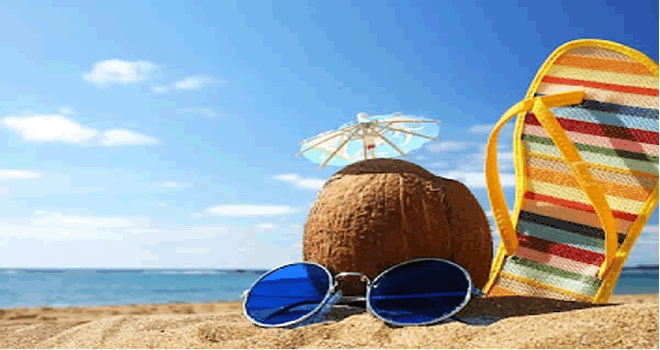

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


image_path = '/content/capa-ferias-coletivas.png'
image = cv2.imread(image_path)

cv2_imshow(image)

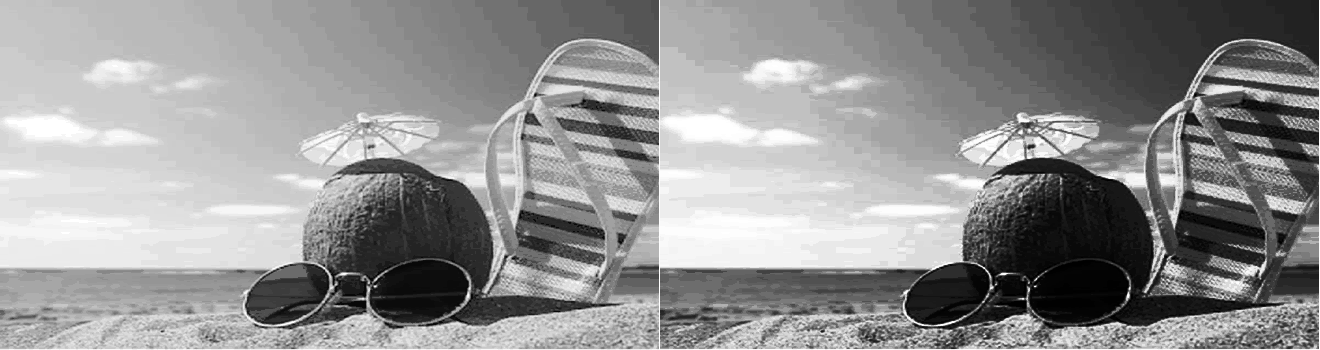

In [ ]:
# Converter a imagem para escala de cinza
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplicar a equalização de histograma
equalized_image = cv2.equalizeHist(gray_image)

# lado a lado da original e da equalizada
combined_image = cv2.hconcat([gray_image, equalized_image])
cv2_imshow(combined_image)

O equalizeHist nos ajuda a criar uma invariância em uma imagem em relação a variações de luminosidade. Ele melhora o contraste de uma imagem, equalizando a distribuição de intensidades.

Ao melhorar o contraste da imagem, a equalização de histograma pode ajudar a destacar características distintivas, tornando-as mais visíveis e potencialmente facilitando a detecção dessas características.

Text(0.5, 1.0, 'Histograma Equalizado')

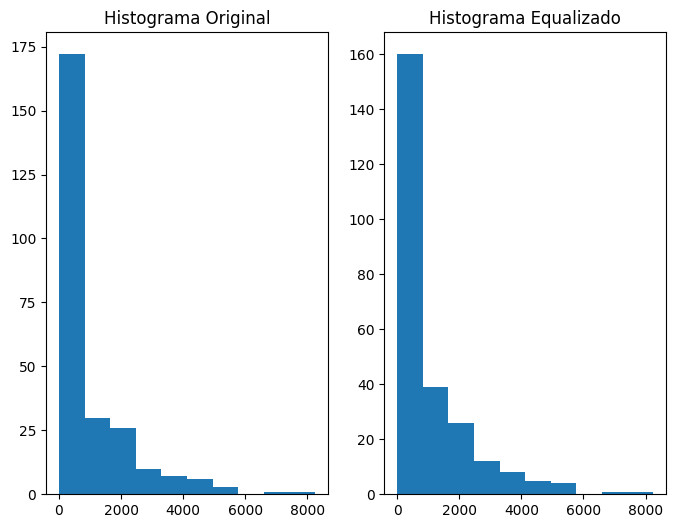

In [ ]:
# Calcular o histograma da imagem original
hist_orig = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

# Calcular o histograma da imagem equalizada
hist_eq = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

# Criar uma figura e eixos para os histogramas
fig, axes = plt.subplots(1, 2, figsize=(8, 6))

# Plotar o histograma da imagem original
axes[0].hist(hist_orig)
axes[0].set_title('Histograma Original')

# Plotar o histograma da imagem equalizada
axes[1].hist(hist_eq)
axes[1].set_title('Histograma Equalizado')

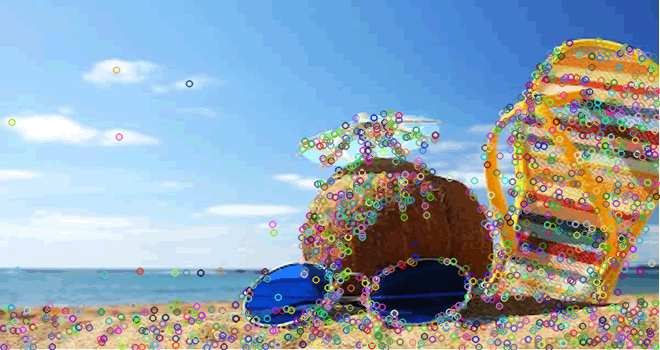

In [ ]:
# Inicializar o detector SIFT
sift = cv2.xfeatures2d.SIFT_create()

# Detectar e extrair características da imagem
keypoints, descriptors = sift.detectAndCompute(gray_image, None)

# Desenhar as características na imagem original
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

# Exibir a imagem com as características
cv2_imshow(image_with_keypoints)

In [ ]:
def PlotaCompara(gray1, gray2, kp1, kp2, matches):
  # Ordenar os matches pela distância
  matches = sorted(matches, key=lambda x: x.distance)

  # Desenhar os matches na imagem
  img3 = cv2.drawMatches(gray1, kp1, gray2, kp2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

  # Exibir a imagem com os matches
  plt.figure(figsize=(20, 22))
  plt.imshow(img3)
  plt.show()

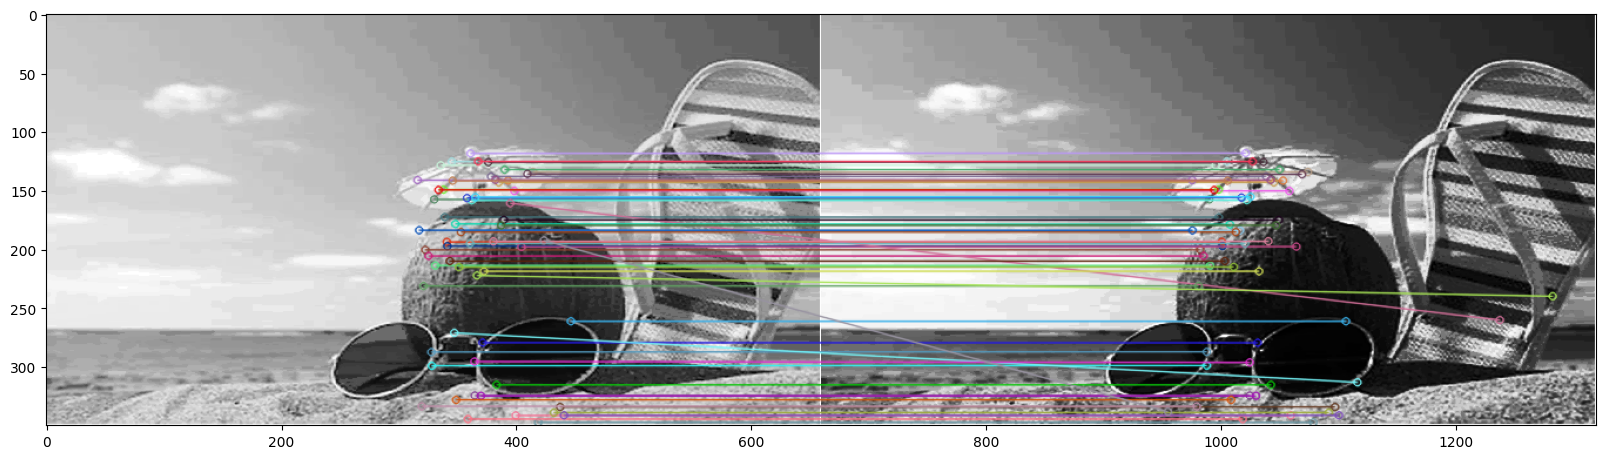

In [ ]:
# Detector SIFT
detector = cv2.xfeatures2d.SIFT_create()

# Descritor SIFT
descriptor = detector

# Encontrar keypoints e calcular descritores para a imagem de referência (img1)
kp1 = detector.detect(gray_image)
kp1, desc1 = descriptor.compute(gray_image, kp1)

# Encontrar keypoints e calcular descritores para a segunda imagem (img2)
kp2 = detector.detect(equalized_image)
kp2, desc2 = descriptor.compute(equalized_image, kp2)

# Configurar o BFMatcher com normType=cv2.NORM_L1 e crossCheck=True
matcher = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

# Realizar a correspondência dos descritores
matches = matcher.match(desc1, desc2)

PlotaCompara(gray_image, equalized_image, kp1, kp2, matches[200:500:5]) # Foi reduzimos o número de plots para visualizar as correspondencias melhor